In [1]:
# 导入pandas工具包，并且更名为pd。
import pandas as pd


# 调用pandas工具包的read_csv函数/模块，传入训练文件地址参数，获得返回的数据并且存至变量df_train。
df_train = pd.read_csv('../datasets/breast-cancer-train.csv')

# 调用pandas工具包的read_csv函数/模块，传入测试文件地址参数，获得返回的数据并且存至变量df_test。
df_test = pd.read_csv('../datasets/breast-cancer-test.csv')

# 选取’Clump Thickness’与’Cell Size’作为特征，构建测试集中的正负分类样本。
df_test_negative = df_test.loc[df_test['Type'] == 0][['Clump Thickness', 'Cell Size']]
df_test_positive = df_test.loc[df_test['Type'] == 1][['Clump Thickness', 'Cell Size']]


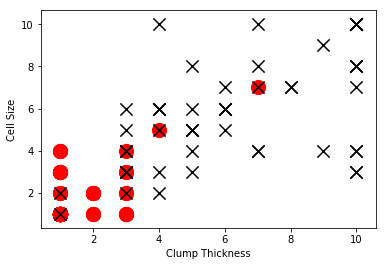

In [2]:
# 导入matplotlib工具包中的pyplot并简化命名为plt。
import matplotlib.pyplot as plt

# 绘制图2中的良性肿瘤样本点，标记为红色的o。
plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'], marker = 'o', s=200, c='red')
# 绘制图2中的恶性肿瘤样本点，标记为黑色的x。
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'], marker = 'x', s=150, c='black')

# 绘制x,y轴的说明。
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

# 显示图2。
plt.show()

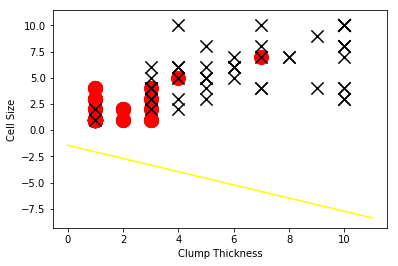

In [3]:
# 导入numpy工具包，并且重命名为np。
import numpy as np

np.random.seed(2019)
# 利用numpy中的random函数随机采样直线的截距和系数。
intercept = np.random.random([1])
coef = np.random.random([2])
lx = np.arange(0, 12)
ly = (-intercept - lx * coef[0]) / coef[1]
# 绘制一条随机直线。
plt.plot(lx, ly, c='yellow')

# 绘制图3。
plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'], marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'], marker = 'x', s=150, c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

Testing accuracy (10 training samples): 0.8685714285714285


/Users/michael/anaconda/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


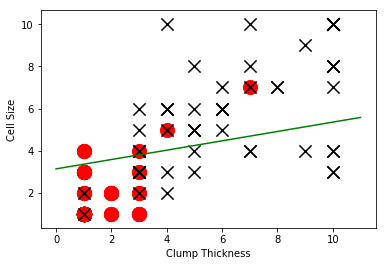

In [4]:
# 导入sklearn中的逻辑斯蒂回归分类器。
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 使用前10条训练样本学习直线的系数和截距。
lr.fit(df_train[['Clump Thickness', 'Cell Size']][:10], df_train['Type'][:10])
print 'Testing accuracy (10 training samples):', lr.score(df_test[['Clump Thickness', 'Cell Size']], df_test['Type'])
# 	Testing accuracy (10 training samples): 0.868571428571

intercept = lr.intercept_
coef = lr.coef_[0, :]

# 原本这个分类面应该是lx * coef[0] + ly * coef[1] + intercept = 0，映射到2维平面上之后，应该是：
ly = (-intercept - lx * coef[0]) / coef[1]

# 绘制图4。
plt.plot(lx, ly, c='green')
plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'], marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'], marker = 'x', s=150, c='black')
plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')
plt.show()

Testing accuracy (all training samples): 0.9371428571428572


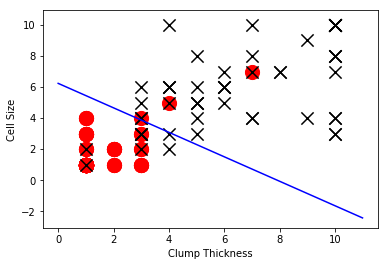

In [5]:
lr = LogisticRegression()
# 使用所有训练样本学习直线的系数和截距。
lr.fit(df_train[['Clump Thickness', 'Cell Size']], df_train['Type'])
print 'Testing accuracy (all training samples):', lr.score(df_test[['Clump Thickness', 'Cell Size']], df_test['Type'])
# 	Testing accuracy (all training samples): 0.937142857143

intercept = lr.intercept_
coef = lr.coef_[0, :]
ly = (-intercept - lx * coef[0]) / coef[1]

# 绘制图5。
plt.plot(lx, ly, c='blue')

plt.scatter(df_test_negative['Clump Thickness'],df_test_negative['Cell Size'], marker = 'o', s=200, c='red')
plt.scatter(df_test_positive['Clump Thickness'],df_test_positive['Cell Size'], marker = 'x', s=150, c='black')

plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

plt.show()
